In [1]:
# Stammdaten
rawdataFolder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
campaignId    = "01_Messkampagne_1"
measurementId = "200218_7"
signalAmplitude = 0.01

In [2]:
import sys
sys.path.append("../toolbox/")
from workflow import *
from jitterClass import analyseMeasurement
import importlib

read done


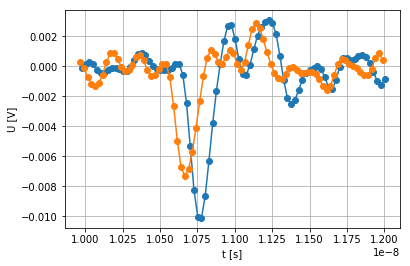

showRawPulse done


In [3]:
M18_02 = analyseMeasurement(rawdataFolder, campaignId, measurementId, signalAmplitude, diagnose = True)

M18_02.read()

M18_02.showRawPulse(pulseNr = 0, style="o-")

In [4]:
M18_02.diagnose(False, True, True, figsize=(8,4))

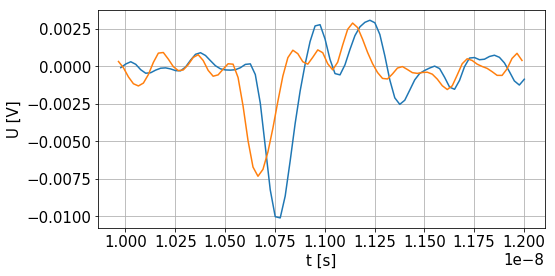

In [5]:
M18_02.showRawPulse(pulseNr = 0, style="-")

In [ ]:
absolute = False
threshold = 0.5

if(absolute):
    s = "Abs"
else:
    s = "Rel"
name = "thres{:d}".format(int(threshold * 100)) + s
 
M18_02.threshold(absolute = absolute, threshold = threshold)

M18_02.calculateDelta(name + "F", M18_02.data["thres"][name][0,0,:,0], M18_02.data["thres"][name][1,0,:,0])
M18_02.calculateDelta(name + "C", M18_02.data["thres"][name][0,1,:,0], M18_02.data["thres"][name][1,1,:,0])
M18_02.calculateDelta(name + "R", M18_02.data["thres"][name][0,2,:,0], M18_02.data["thres"][name][1,2,:,0])

M18_02.histogram(name + "F", name + "F")
M18_02.histogram(name + "C", name + "C")
M18_02.histogram(name + "R", name + "R")

M18_02.fitHist(name + "F", name + "F")
M18_02.fitHist(name + "C", name + "C")
M18_02.fitHist(name + "R", name + "R")

In [ ]:
M18_02.showResult(name + "F")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "C")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "R")

In [ ]:
M18_02.fitGauss(threshold = 0.2, diagnosePulse=0)

M18_02.calculateDelta("gauss", M18_02.data["gauss"][0,:,1], M18_02.data["gauss"][1,:,1])

M18_02.histogram("gauss", "gauss")

M18_02.fitHist("gauss", "gauss")

In [ ]:
M18_02.showResult("gauss")

In [ ]:
plt.plot(M18_02.data["gauss"][0,:,1][:20])
plt.plot(M18_02.data["gauss"][1,:,1][0:20] + 0.42e-9)

In [ ]:
plt.plot(M18_02.data["gauss"][0,:,1] - M18_02.data["gauss"][1,:,1])

In [ ]:
%load_ext autoreload

In [ ]:
exportedDict = M18_02.exportDict()
%autoreload
M18_02 = analyseMeasurement(diagnose = True)
M18_02.importDict(exportedDict)